# EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('../data/movies.csv')
ratings = pd.read_csv('../data/ratings.csv')

In [3]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [5]:
print(ratings.describe())
print()
print(ratings.info())
print()
print(ratings.shape)

              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

(1

In [6]:
print(movies.describe())
print()
print(movies.info())
print()
print(movies.shape)

             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

(9742, 3)


In [7]:
print(ratings.value_counts())
print()
print(movies.value_counts())

userId  movieId  rating  timestamp 
1       1        4.0     964982703     1
        3        4.0     964981247     1
        6        4.0     964982224     1
        47       5.0     964983815     1
        50       5.0     964982931     1
                                      ..
610     166534   4.0     1493848402    1
        168248   5.0     1493850091    1
        168250   5.0     1494273047    1
        168252   5.0     1493846352    1
        170875   3.0     1493846415    1
Name: count, Length: 100836, dtype: int64

movieId  title                                      genres                                     
1        Toy Story (1995)                           Adventure|Animation|Children|Comedy|Fantasy    1
2        Jumanji (1995)                             Adventure|Children|Fantasy                     1
3        Grumpier Old Men (1995)                    Comedy|Romance                                 1
4        Waiting to Exhale (1995)                   Comedy|Drama|Romanc

In [8]:
print(movies['movieId'].value_counts())
print()
print(movies['movieId'].nunique())

movieId
1         1
2         1
3         1
4         1
5         1
         ..
193581    1
193583    1
193585    1
193587    1
193609    1
Name: count, Length: 9742, dtype: int64

9742


In [9]:
print(ratings['movieId'].value_counts())
print()
print(ratings['movieId'].nunique())

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
160341      1
160527      1
160836      1
163937      1
135534      1
Name: count, Length: 9724, dtype: int64

9724


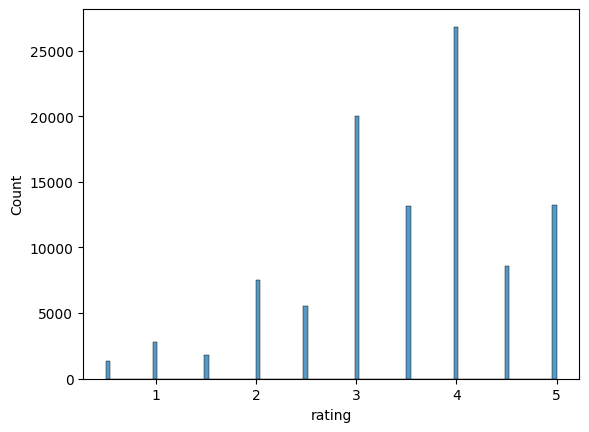

In [10]:
sns.histplot(ratings, x='rating')
plt.show()

In [11]:
rating_count_per_user = ratings.groupby('userId')['rating'].count().reset_index()
rating_count_per_user.columns = ['userId', 'rating_count']
rating_count_per_user

,userId,rating_count
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44
...,...,...
605,606,1115
606,607,187
607,608,831
608,609,37


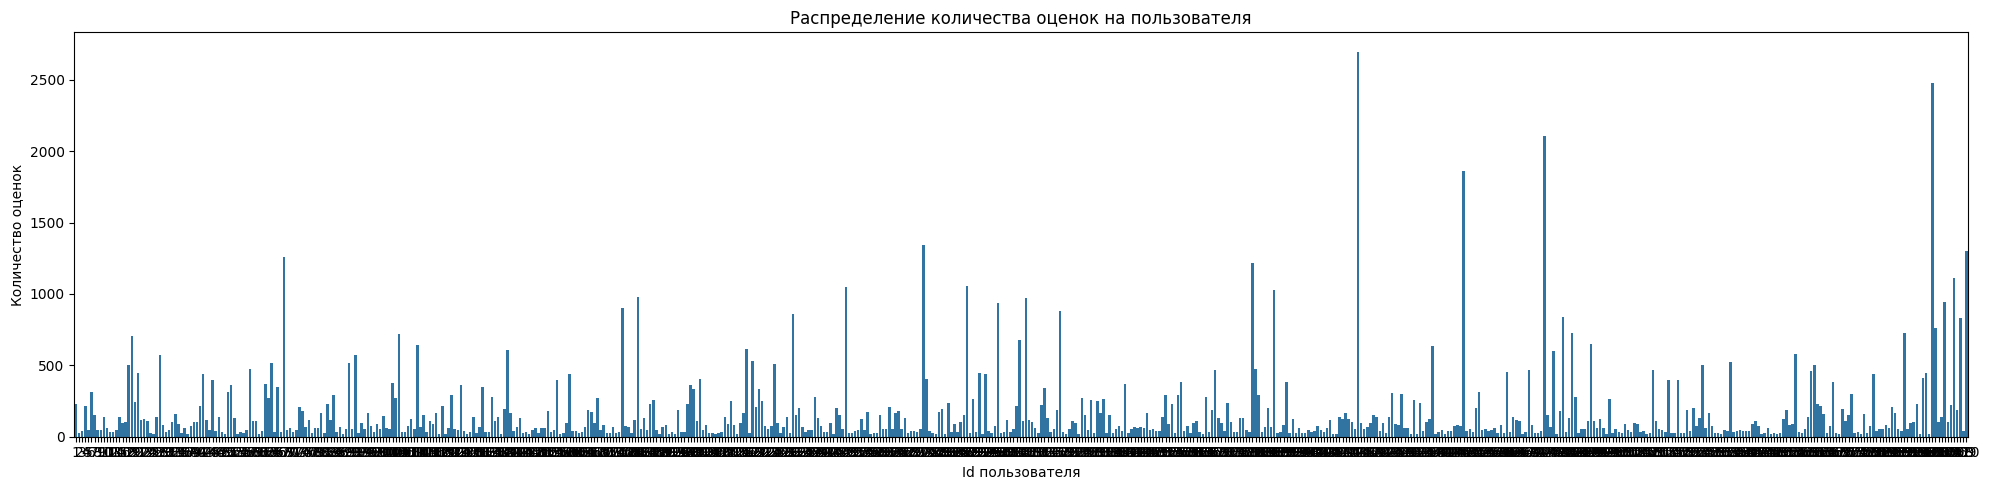

In [12]:
rating_count_per_user = ratings.groupby('userId')['rating'].count().reset_index()
rating_count_per_user.columns = ['userId', 'rating_count']

plt.figure(figsize=(20, 5))
sns.barplot(data=rating_count_per_user, x='userId', y='rating_count')
plt.title('Распределение количества оценок на пользователя')
plt.xlabel('Id пользователя')
plt.ylabel('Количество оценок')
plt.tight_layout()
plt.show()

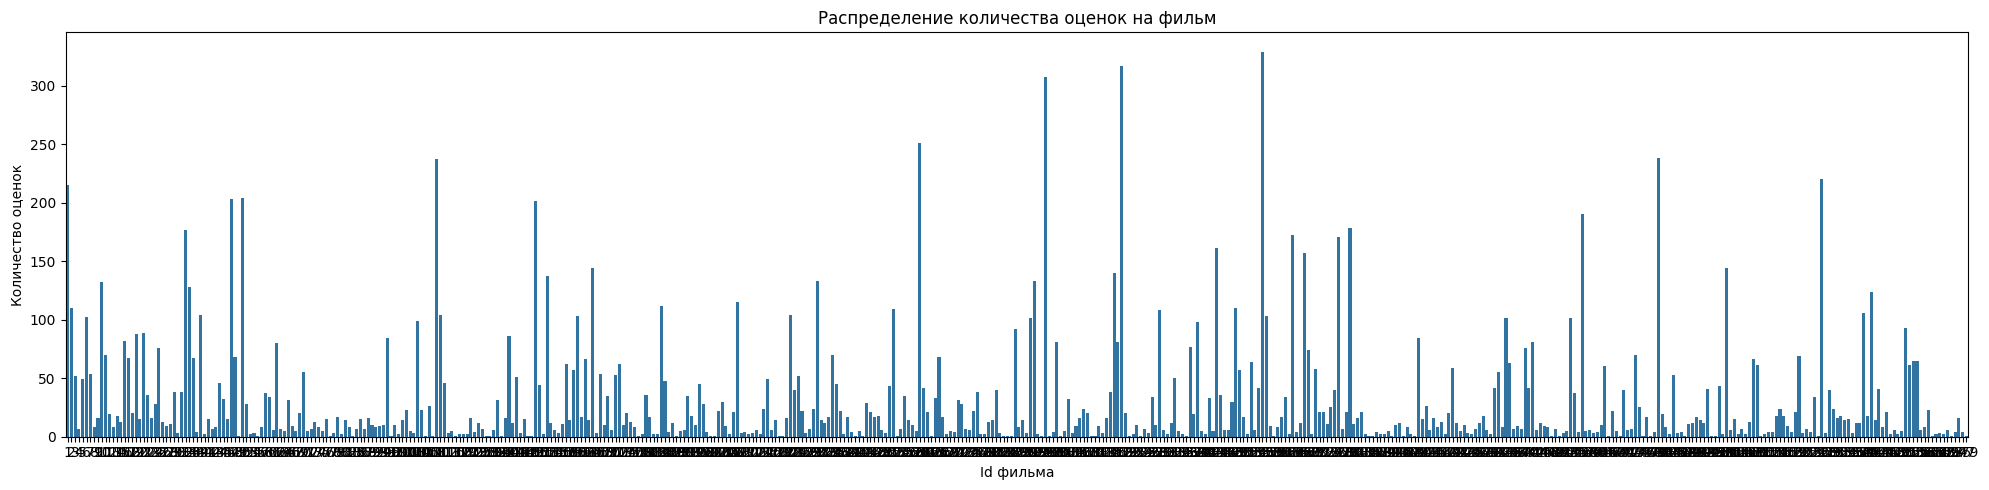

In [13]:
rating_count_per_movie = ratings.groupby('movieId')['rating'].count().reset_index()
rating_count_per_movie.columns = ['movieId', 'rating_count']
rating_count_per_movie_short = rating_count_per_movie.iloc[:500]

plt.figure(figsize=(20, 5))
sns.barplot(data=rating_count_per_movie_short, x='movieId', y='rating_count')
plt.title('Распределение количества оценок на фильм')
plt.xlabel('Id фильма')
plt.ylabel('Количество оценок')
plt.tight_layout()
plt.show()

In [14]:
mean_movies_rating = ratings.groupby('movieId')['rating'].mean().reset_index()
mean_movies_rating.columns = ['movieId', 'mean_rating']

movies_by_rates_count = rating_count_per_movie.sort_values(
    by='rating_count', 
    ascending=False
).reset_index().iloc[:10]

movies_by_rates_count_mean_rating = mean_movies_rating[
    mean_movies_rating['movieId'].isin(movies_by_rates_count['movieId'])
]

movies_by_rates_value = mean_movies_rating.sort_values(
    by='mean_rating', 
    ascending=False
).reset_index().iloc[:10]

movies_by_rates_value_rates_count = rating_count_per_movie[
    rating_count_per_movie['movieId'].isin(movies_by_rates_value['movieId'])
]

movies_by_rates_count_with_title = movies_by_rates_count.merge(
    movies[['movieId', 'title']], 
    on='movieId', 
    how='left'
)

movies_by_rates_count_mean_rating_with_title = movies_by_rates_count_mean_rating.merge(
    movies[['movieId', 'title']], 
    on='movieId', 
    how='left'
)

movies_by_rates_value_with_title = movies_by_rates_value.merge(
    movies[['movieId', 'title']], 
    on='movieId', 
    how='left'
)

movies_by_rates_value_rates_count_with_title = movies_by_rates_value_rates_count.merge(
    movies[['movieId', 'title']], 
    on='movieId', 
    how='left'
)

10 самых оценённых фильмов

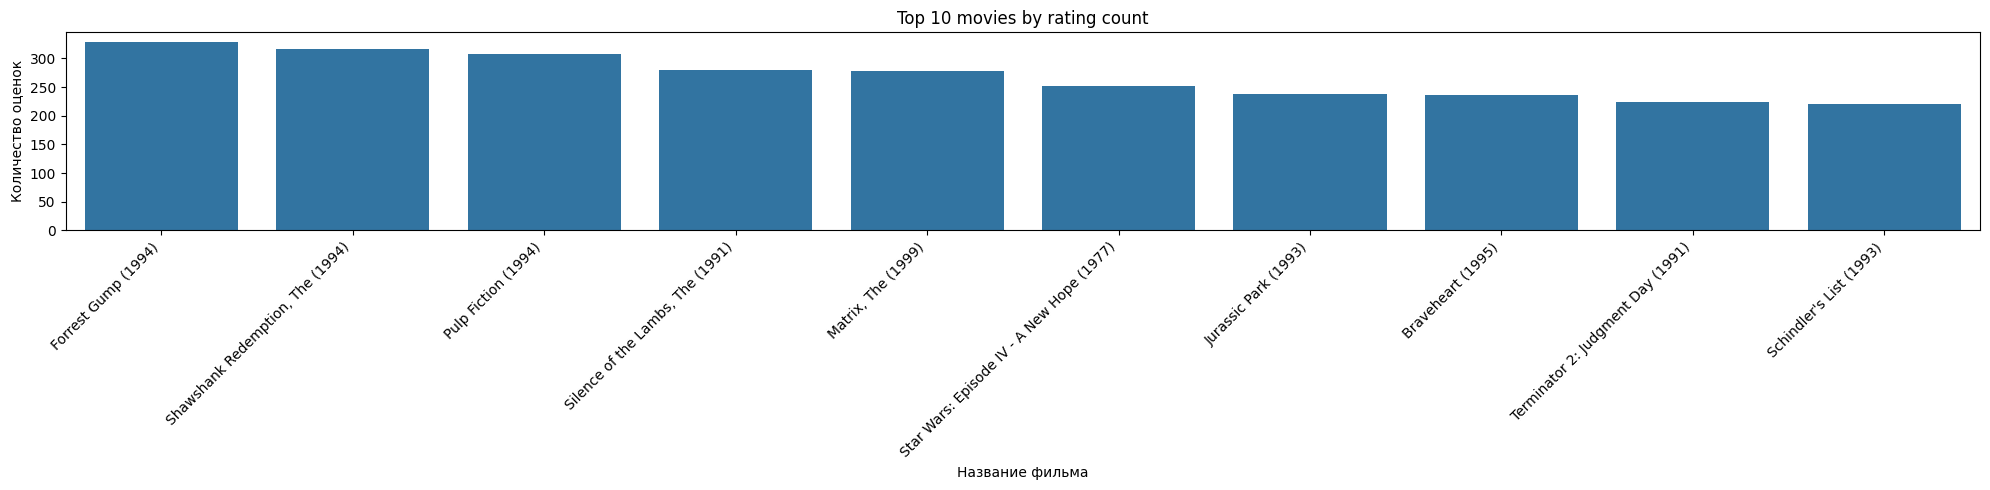

In [15]:
plt.figure(figsize=(20, 5))
sns.barplot(data=movies_by_rates_count_with_title, x='title', y='rating_count')
plt.title('Top 10 movies by rating count')
plt.xlabel('Название фильма')
plt.ylabel('Количество оценок')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Средние оценки самых оценённых фильмов

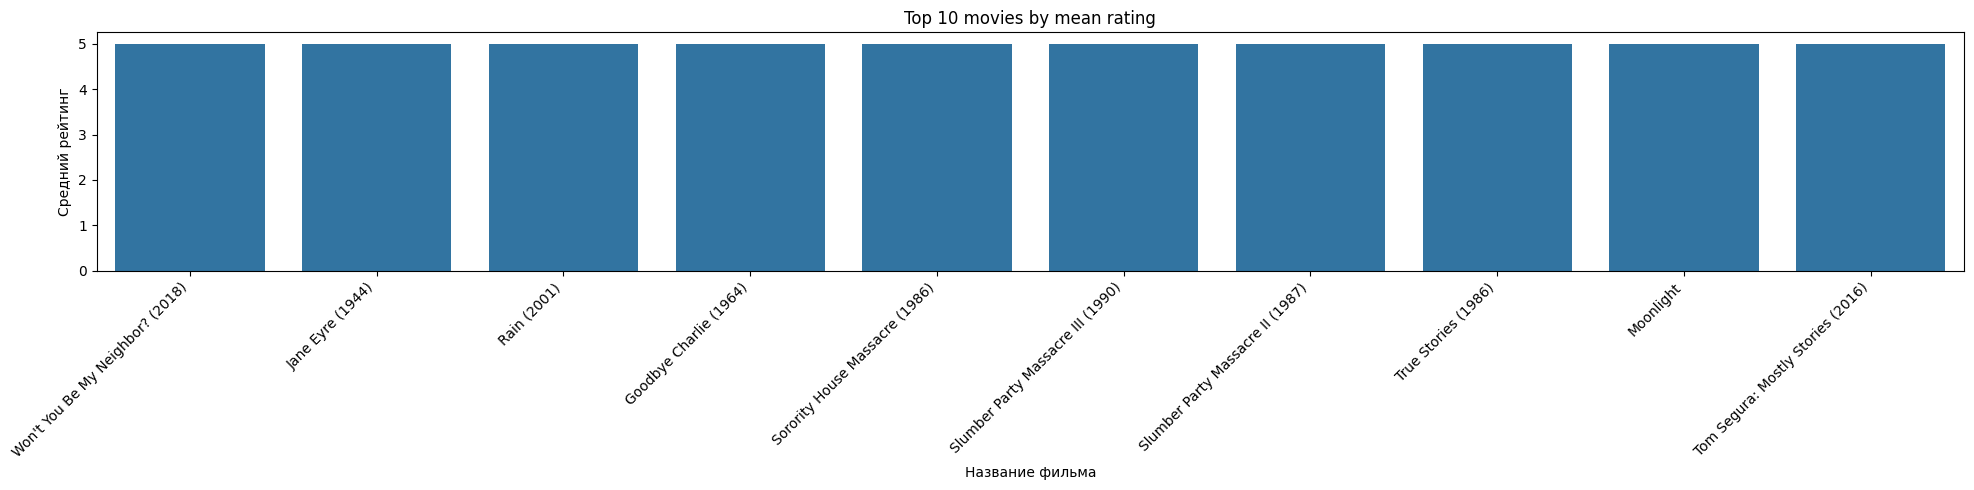

In [16]:
plt.figure(figsize=(20, 5))
sns.barplot(data=movies_by_rates_value_with_title, x='title', y='mean_rating')
plt.title('Top 10 movies by mean rating')
plt.xlabel('Название фильма')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

10 лучших фильмо по оценкам

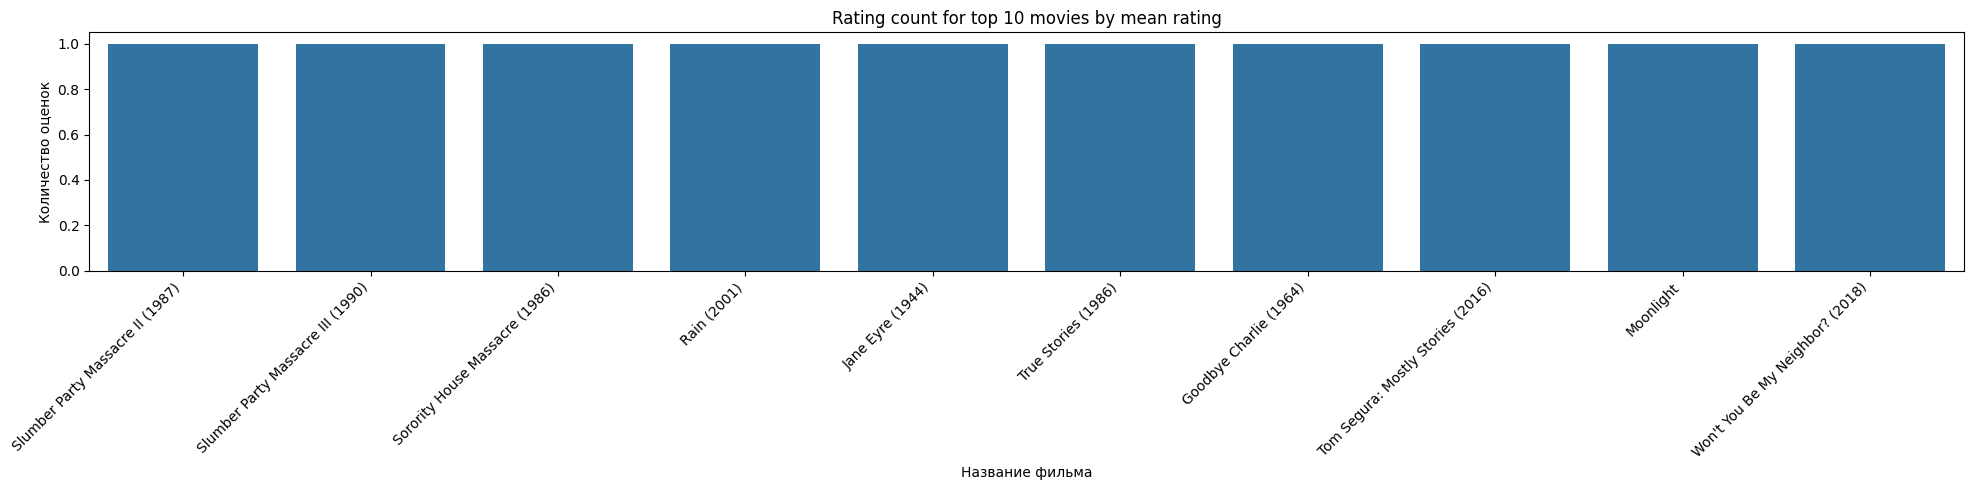

In [17]:
plt.figure(figsize=(20, 5))
sns.barplot(data=movies_by_rates_value_rates_count_with_title, x='title', y='rating_count')
plt.title('Rating count for top 10 movies by mean rating')
plt.xlabel('Название фильма')
plt.ylabel('Количество оценок')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()